### Step 1: Load and Preview the Country Relationships Data

In [1]:
import pyvis
import seaborn as sns
import cdlib

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns

In [3]:
# Define the file path for the country relationships CSV
file_path = "/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/CF_S1/20th-century/Scraped_data/country_relationships.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to inspect column names and structure
df.head()

,source,target,value
0,India,South Africa,1
1,China,South Africa,3
2,Germany,Italy,10
3,Italy,Panama,1
4,France,Panama,3


### Step 2 Create a Network Object from the DataFrame

In [4]:
# Create the graph from the DataFrame
# Replace "source", "target", and "value" with your actual column names if needed
G = nx.from_pandas_edgelist(df,
                            source="source",     # column with source country
                            target="target",     # column with target country
                            edge_attr="value",   # column showing relationship strength
                            create_using=nx.Graph())  # undirected graph

### Step 3: Plot the Static Network Graph (Basic Check)

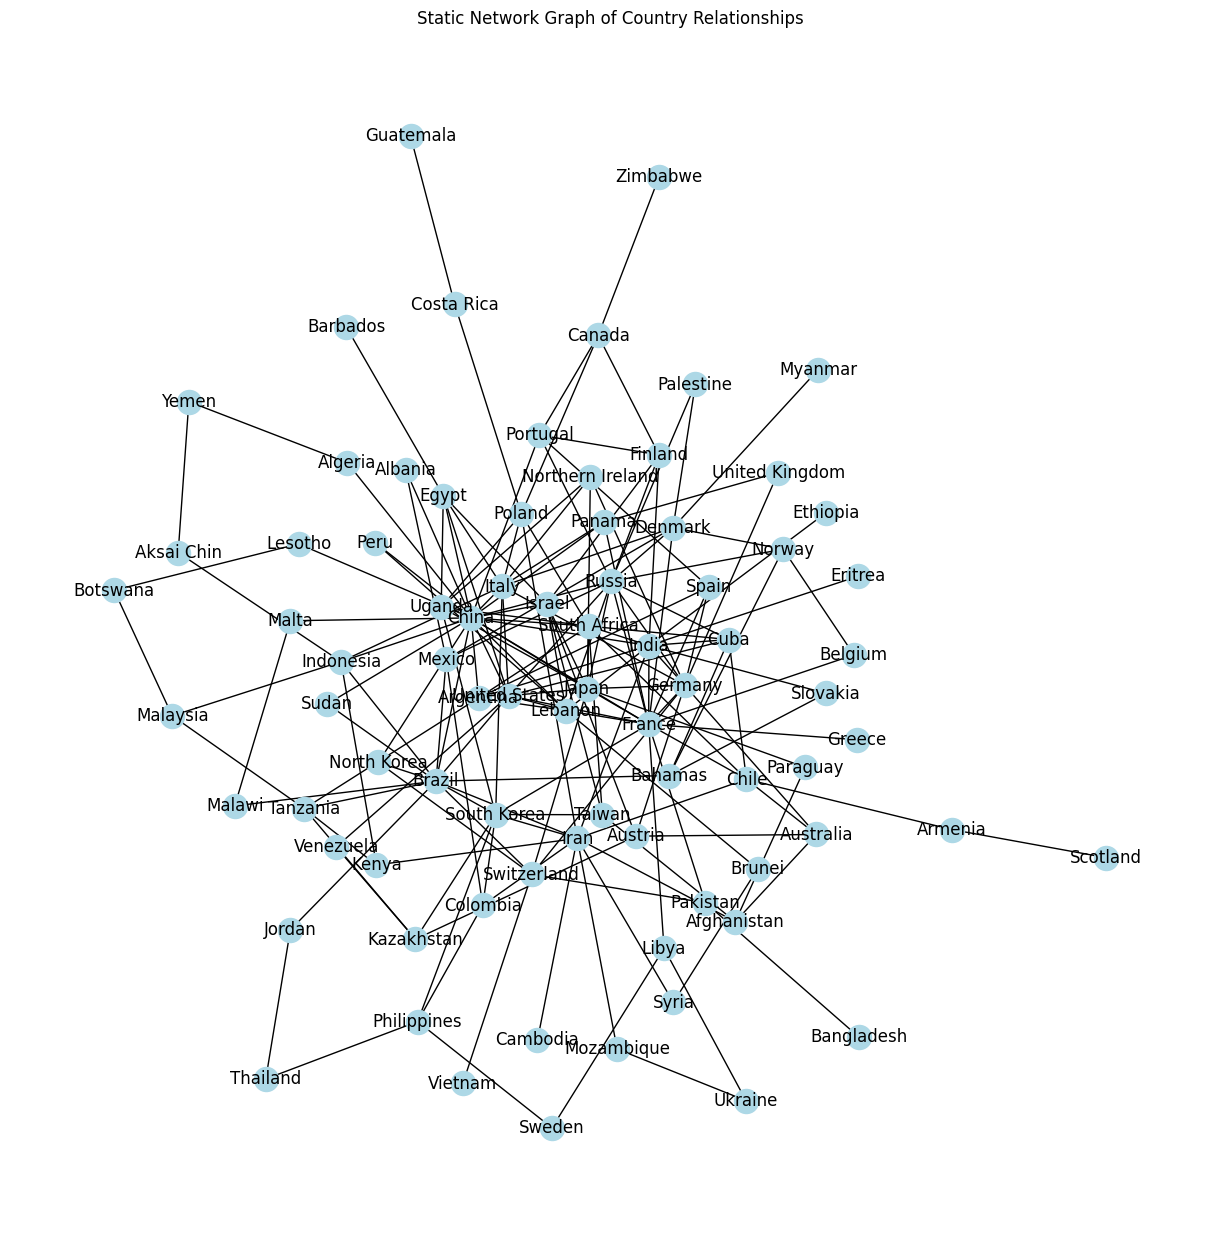

In [5]:
# Set up the plot area
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

# Calculate node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw the network graph with labels
nx.draw(G,
        with_labels=True,           # show country names
        node_color='lightblue',     # fill color of nodes
        edge_cmap=plt.cm.Blues,     # color map for edges (optional)
        pos=pos)

# Add a title and display the plot
plt.title("Static Network Graph of Country Relationships")
plt.show()


### Step 4: Create an Interactive Network Graph with Pyvis

In [6]:
# Create a new pyvis network object with custom size and colors
net = Network(notebook=True, width="1000px", height="800px", bgcolor="#222222", font_color="white")

# Calculate degree (number of connections) for each node
node_degree = dict(G.degree)

# Assign node sizes based on degree
nx.set_node_attributes(G, node_degree, "size")

# Convert NetworkX graph to Pyvis format
net.from_nx(G)

# Add layout and filter buttons (optional UI features)
net.show_buttons(filter_=True)

# Apply force-directed repulsion layout (prevents node overlap)
net.repulsion()

# Save and render the interactive graph in your browser
net.show("country_network.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Step 5: Community detection with Leiden algorithm.

In [7]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'graph_tool', 'wurlitzer', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [8]:
# Import the community detection algorithm
from cdlib import algorithms

# Apply Leiden community detection to your graph
coms = algorithms.leiden(G)

# Convert the output into a dictionary mapping each node to a community number
new_com = coms.to_node_community_map()
dict_com = {k: v[0] for k, v in new_com.items()}  # Simplify the format


### Step 6: Visualize Detected Communities with Pyvis

In [9]:
# Set community group info on the graph
nx.set_node_attributes(G, dict_com, "group")

# Create new pyvis network for visualizing communities
from pyvis.network import Network

com_net = Network(notebook=True, width="1000px", height="800px", bgcolor="#222222", font_color="white")

# Load the graph with community groupings
com_net.from_nx(G)

# Enable interactive features
com_net.show_buttons(filter_=True)
com_net.repulsion()

# Export and open HTML
com_net.show("country_communities_leiden.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Step 7: Centrality Measures

<AxesSubplot:title={'center':'Degree Centrality'}, xlabel='Country'>

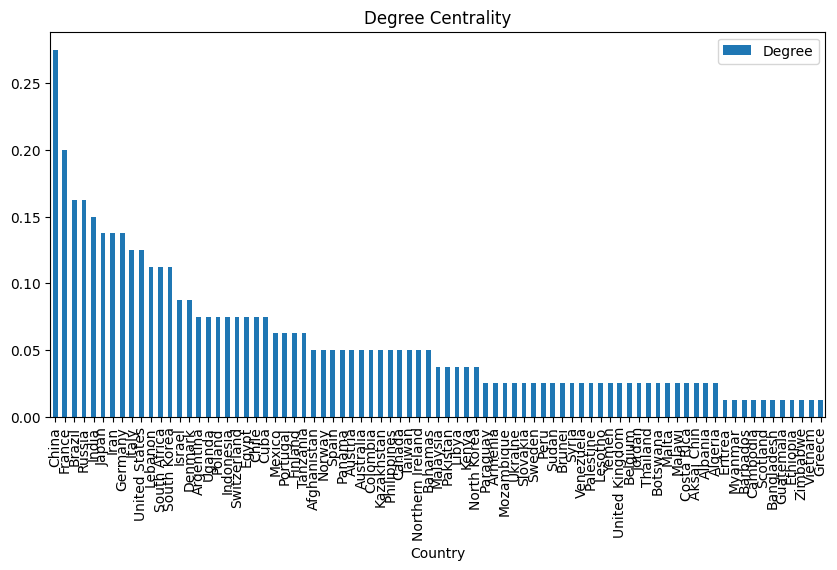

In [10]:
# ✅ Calculate degree centrality: number of connections per node
degree_dict = nx.degree_centrality(G)

# ✅ Convert to DataFrame for plotting
degree_df = pd.DataFrame(degree_dict.items(), columns=["Country", "Degree"])

# ✅ Sort and plot
degree_df.sort_values(by="Degree", ascending=False).plot(
    kind="bar", x="Country", y="Degree", figsize=(10, 5), title="Degree Centrality"
)

#### Countries with highest connections are often the most involved or central in the network.

<AxesSubplot:title={'center':'Closeness Centrality'}, xlabel='Country'>

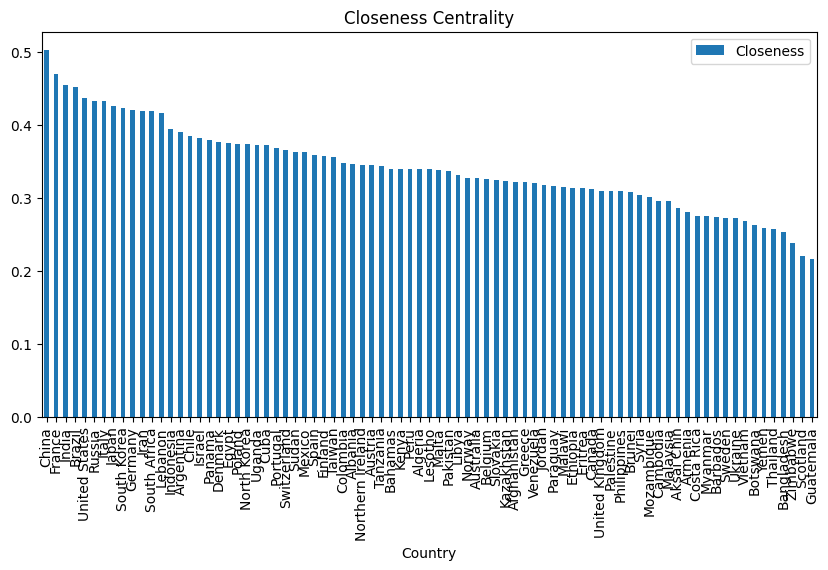

In [11]:
# ✅ Calculate closeness: how near a node is to all others
closeness_dict = nx.closeness_centrality(G)

# ✅ Convert and plot
closeness_df = pd.DataFrame(closeness_dict.items(), columns=["Country", "Closeness"])
closeness_df.sort_values(by="Closeness", ascending=False).plot(
    kind="bar", x="Country", y="Closeness", figsize=(10, 5), title="Closeness Centrality"
)

#### High closeness means better positioned to spread or access information quickly.

<AxesSubplot:title={'center':'Betweenness Centrality'}, xlabel='Country'>

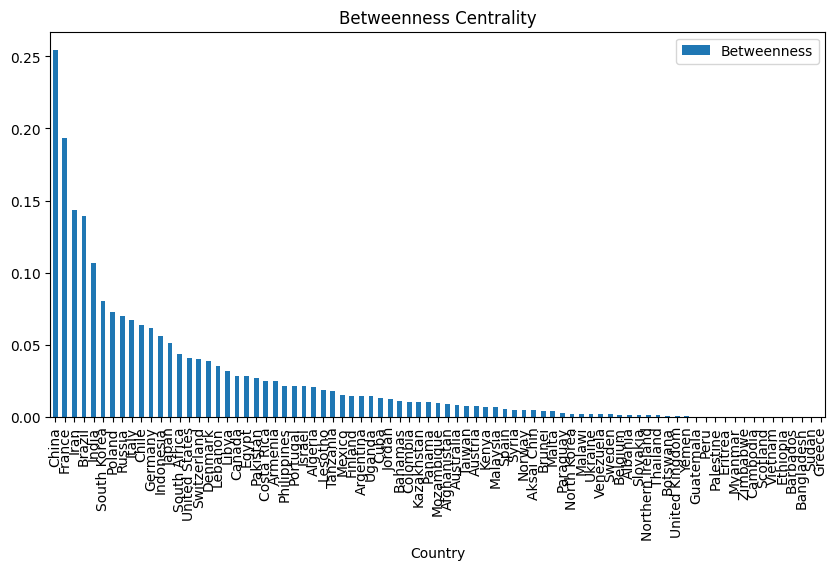

In [12]:
# ✅ Calculate betweenness: how often a node lies on shortest paths
betweenness_dict = nx.betweenness_centrality(G)

# ✅ Convert and plot
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=["Country", "Betweenness"])
betweenness_df.sort_values(by="Betweenness", ascending=False).plot(
    kind="bar", x="Country", y="Betweenness", figsize=(10, 5), title="Betweenness Centrality"
)

#### High betweenness means important connector or broker between clusters.